# Lab 1

## The way i understand this assignement.
- Read the files and transfer them into variables
- Use binary classifcation for machine learning
- Plot the results

## Bonus such as estetics suchs as user input.

Since this exercise is made to evaluate me i will document my thought process and do continuous uploads.

Step 1: Read the files and store them.

    Problems faced:
- HeaderFile (width (cm), height (cm)) making it annoying.
- One format to read lines from the training data and different way to read the test_points
- Generally annoying too figure out where to strip,replace and split.

GitCommit 1 for Lab1

Step 2: Get basic plots up and develop the mean points + Calcultion.

    Problems faced:

- Correct Syntax is a struggle
- Initiations and plot is ugly
- Code becoming spaggetio

GitCommit 2 for Lab1
GitCommit 3 for lab 1(Cleaning and objective achieved.)

Step 3: Add userinput(w) to test_points and clean it and place into functions.

    Problems faced:

- Appending in a way that it can be reintepreted
- Deciding between appending/interpreting techniques
- Confused as to whether BinaryClassification was needed?

Gitcomit 4 för Lab(Passable criteria reached)

Step 4: Clean into more functions, more if statements to keep data reasonable, lay down foundation to reach highest criteria.

    Problems faced:

- Not really any, could copy paste some logic and i tried to just pull 5 random numbers using sample and it works just fine so don't need much extra.

Gitcommit 5 for lab.

Step 5: Better guardrails  

    Problems faced:

- Noticed i didn't change test_data_output so its fixed now.


Gitcommit 6 for lab.

Step 6: Using KNN

    Problems faced:

- Trying to make due without the label.

GitCommit 7 for Lab.

Step 7: return to step 4

    Problems faced:
- Refusing to use type is making it more difficult in some ways.
- Functional programming messes a little with the order Logic of things.

Step 8: Increased usage of Numpy and added KNN to accuracy detection

    Problems faced:
- Some logical issues

Commit 8 for Lab


Accuracy of Euclidian Distance for random entries: 98.33% out of 60 samples
Accuracy of KNN for random entries: 98.33% out of 60 samples
Sample with (width, height): (20.0, 30.1) is closer to Pichu by k-NN where k=5

BinaryClassification:
Sample with (width, height): (25.0, 35.0) classified as Pikachu
Sample with (width, height): (15.0, 14.0) classified as Pichu
Sample with (width, height): (26.0, 30.0) classified as Pikachu
Sample with (width, height): (22.0, 45.0) classified as Pichu

Euclidian Distance:
Sample with (width, height): (25.0, 35.0) classified as Pikachu
Sample with (width, height): (15.0, 14.0) classified as Pichu
Sample with (width, height): (26.0, 30.0) classified as Pichu
Sample with (width, height): (22.0, 45.0) classified as Pikachu


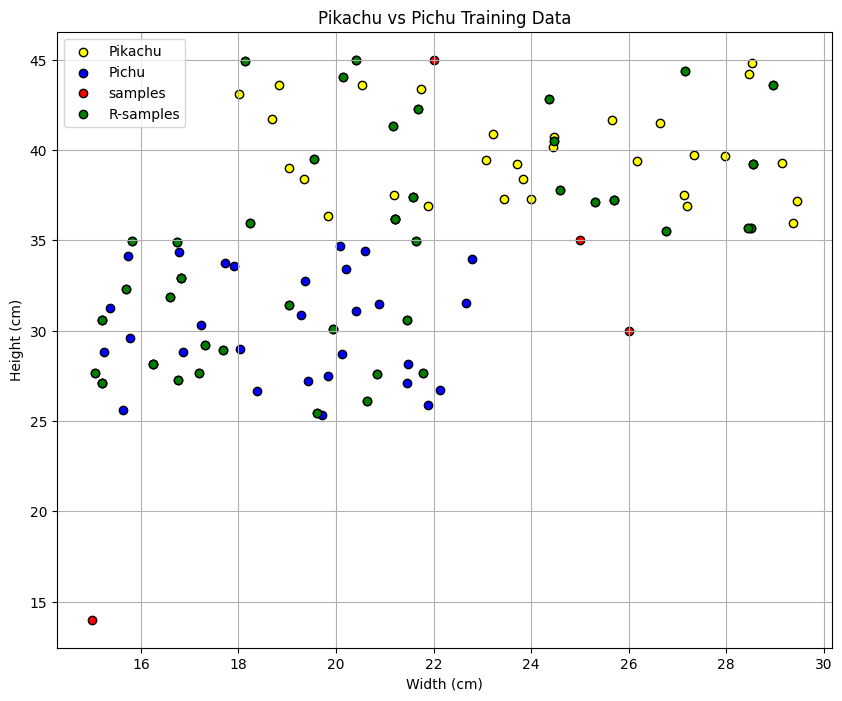

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random


OG_Pikachu_Data =[]
OG_Pichu_Data =[]

Pikachu_data = []
Pichu_data = []

test_data = []
test_data_R = []


def read_data(file_path, data_list,OG_data, data_random):
    TMP = []
    with open(file_path, "r") as file:
        next(file)  
        for line in file:
            width, height = map(float, line.strip().replace(
                "(", "").replace(")", "").split(","))
            TMP.append((width, height))
            OG_data.append((width, height))
    
    Chosen_elements = random.sample(TMP, 45)
    data_list.extend(Chosen_elements)
    remaining_elements = [item for item in TMP if item not in Chosen_elements]
    data_random.extend(remaining_elements)
    
    with open("Lab1_test_points_random.txt", "a") as file:
      for width, height in remaining_elements:
          file.write(f"({width}, {height})"+ ", ")
            
            
def read_data_type2(filename, list):
    with open(filename, "r") as file:
        for line in file:
            if line.strip():
                pairs = line.strip().rstrip(',').split("), (")
                for pair in pairs:
                    if pair.strip():
                        width, height = pair.replace(
                            "(", "").replace(")", "").split(",")
                        list.append((float(width), float(height)))

                
                    
read_data("Lab1_pikachu.txt", Pikachu_data, OG_Pikachu_Data, test_data_R)
read_data("Lab1_pichu.txt", Pichu_data,OG_Pichu_Data, test_data_R)
read_data_type2("Lab1_test_points.txt",test_data)
read_data_type2("Lab1_test_points_random.txt", test_data_R)
                    
Pichu_array = np.array(Pichu_data)
Pikachu_array = np.array(Pikachu_data)
mean_width_height_Pichu = np.mean(Pichu_array, axis=0)
mean_width_height_Pikachu = np.mean(Pikachu_array, axis=0)

std_width_height_Pichu = np.std(Pichu_array, axis=0)            # ChatGPT-Syntax
std_width_height_Pikachu = np.std(Pikachu_array, axis=0)        # ChatGPT-Syntax



def BinaryClassification(test_point, mean_Pichu, std_Pichu, mean_Pikachu, std_Pikachu):  # ChatGPT-Syntax
    classification = "Pikachu" if all(test_point > mean_Pichu - std_Pichu) and all(      # ChatGPT-Syntax
        test_point < mean_Pikachu + std_Pikachu) else "Pichu"
    return f"Sample with (width, height): {test_point} classified as {classification}"


def EucalyptusDistance(test_point, Pikachu_data, Pichu_data):           # Euclidian 
    
    Pikachu_data_np = np.array(Pikachu_data)
    Pichu_data_np = np.array(Pichu_data)
    
    #Numpy instead of list
    Pikachu_data_np = [np.sqrt((test_point[0] - p[0])**2 + (test_point[1] - p[1])**2) for p in Pikachu_data]
    Pichu_data_np = [np.sqrt((test_point[0] - p[0])**2 + (test_point[1] - p[1])**2) for p in Pichu_data]

    avg_dist_to_Pikachu = np.mean(Pikachu_data_np)
    avg_dist_to_Pichu = np.mean(Pichu_data_np)

    #Numpy instead of list
    classification = np.where(avg_dist_to_Pikachu < avg_dist_to_Pichu, "Pikachu", "Pichu")     
    return f"Sample with (width, height): {test_point} classified as {classification}"

def kNN_Classification(test_point, Pikachu_data, Pichu_data, k=5):
    
    KNN_Pikachu_data_np = np.array(Pikachu_data)
    KNN_Pichu_data_np = np.array(Pichu_data)
    
    KNN_Pikachu_data_np = [(p[0], p[1], 1) for p in Pikachu_data]
    KNN_Pichu_data_np = [(p[0], p[1], 0) for p in Pichu_data]
    KNN_Data = np.concatenate([KNN_Pikachu_data_np, KNN_Pichu_data_np])

    distances = np.sqrt(np.sum((test_point - KNN_Data[:, :2])**2, axis=1))

  
    distances_labeled = np.column_stack((distances, KNN_Data[:, 2]))
    distances_labeled_sorted = distances_labeled[distances_labeled[:,0].argsort()]
    
    k_nearest = distances_labeled_sorted[:k]
    counts = np.bincount(k_nearest[:, 1].astype(int))
    
    if len(counts) == 1:  # Only one unique label
            classification = "Pikachu" if counts[0] == 1 else "Pichu"
    else:
            classification = "Pikachu" if counts[1] > counts[0] else "Pichu"
              
    #Return result
    return f"Sample with (width, height): {test_point} is closer to {classification} by k-NN where k={k}"
    

def Accuracy_Check_Random(OG_Pikachu_Data, OG_Pichu_Data, k=5 ):
    correct_classificatios_euc = 0
    correct_classifications_knn = 0
    total_entries = 0
 

    for test_point in test_data_R:
        classification_euc = EucalyptusDistance(
            test_point, OG_Pikachu_Data, OG_Pichu_Data)
        if ("Pikachu" in classification_euc and test_point in OG_Pikachu_Data) or ("Pichu" in classification_euc and test_point in OG_Pichu_Data):
            correct_classificatios_euc += 1

        classification_knn = kNN_Classification(
            test_point, OG_Pikachu_Data, OG_Pichu_Data, k=k)
        if ("Pikachu" in classification_knn and test_point in OG_Pikachu_Data) or ("Pichu" in classification_knn and test_point in OG_Pichu_Data):
            correct_classifications_knn += 1

        total_entries += 1

    accuracy_euc = (correct_classificatios_euc / total_entries) * 100
    accuracy_knn = (correct_classifications_knn / total_entries) * 100
    
    print(f"Accuracy of Euclidian Distance for random entries: {accuracy_euc:.2f}% out of {total_entries} samples")
    print(f"Accuracy of KNN for random entries: {accuracy_knn:.2f}% out of {total_entries} samples")

def New_Test_point(File):
    while True:
        try:
            width = float(input("Insert width(cm)"))
            height = float(input("Insert height(cm)"))
            if width > 0 and height > 0 and width < 100 and height < 100:
                with open(File, "a") as file:
                    file.write(", " + f"({width}, {height})")
                print("Point added!")
                new_test_point = (width, height) 
                return new_test_point
            else:
               print("Value needs to be a float between 0 and 100")
        except ValueError:
            print("Value must a float such as 30.1")
            

def print_result():
    print("\nBinaryClassification:")
    for message in Test_data_output_Binary:
        print(message)

    print("\nEuclidian Distance:")
    for message in Test_data_output_Eucalyptus:
        print(message)
    
def matPlot():
    plt.figure(figsize=(10, 8))
    plt.scatter(*zip(*Pikachu_data), color="yellow", label="Pikachu", edgecolor="black")
    plt.scatter(*zip(*Pichu_data), color="blue", label="Pichu", edgecolor="black")
    plt.scatter(*zip(*test_data), color="red", label="samples", edgecolor="black")
    plt.scatter(*zip(*test_data_R), color="green", label="R-samples", edgecolor="black")    # Added another scatter


    plt.title("Pikachu vs Pichu Training Data")
    plt.xlabel("Width (cm)")
    plt.ylabel("Height (cm)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
Test_data_output_Binary = [BinaryClassification(
point, mean_width_height_Pichu, std_width_height_Pichu, mean_width_height_Pikachu, std_width_height_Pikachu) for point in test_data]


Test_data_output_Eucalyptus = [EucalyptusDistance(
    point, Pikachu_data, Pichu_data) for point in test_data]
    

# new_test_point = (New_Test_point(test_data_link))
classification_result = kNN_Classification((20.0, 30.1), Pikachu_data, Pichu_data)    # Should be done with new_test_point but i don't wanna add a number each time.
Accuracy_Check_Random(OG_Pikachu_Data, OG_Pichu_Data, k=5)
print(classification_result)
print_result()
matPlot()